In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

d:\softwares\Python\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\softwares\Python\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
d:\softwares\Python\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv('MCSDatasetNEXTCONLab.csv')
# df.fillna(0)


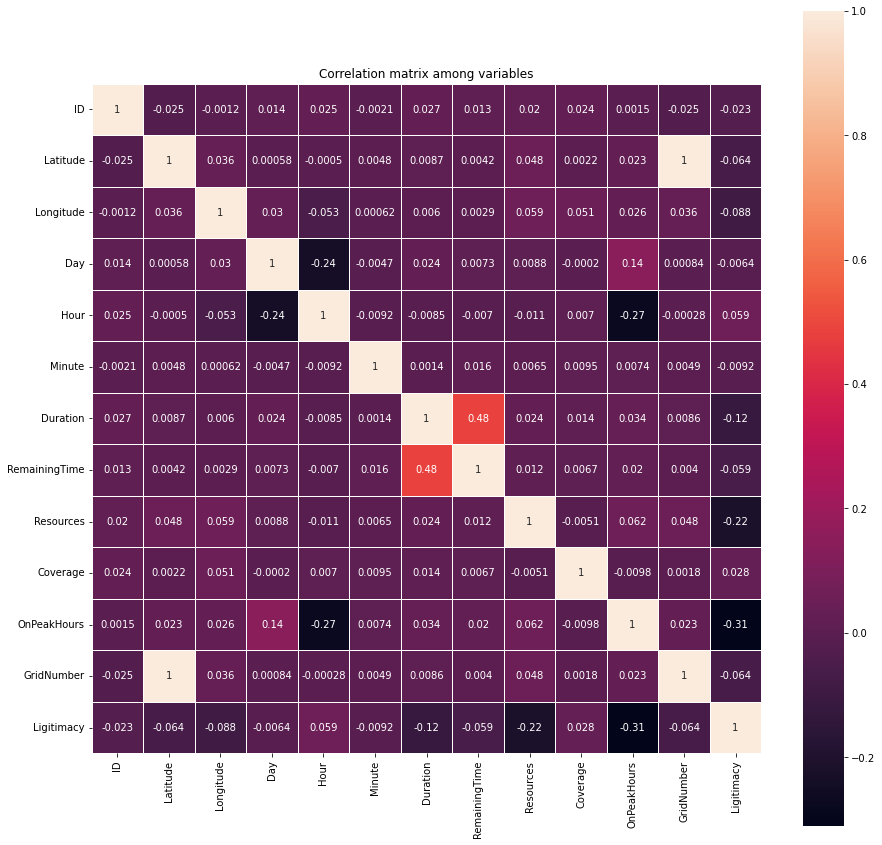

In [3]:
cormat = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cormat, square=True, annot=True, linewidths=0.5)
plt.title("Correlation matrix among variables")
plt.show()

In [4]:
df=df.drop(['ID'],axis=1)
df_train = df[df['Day'] < 5]
df_test = df[df['Day'] >= 5]
del df_test['Day']
del df_train['Day']

In [5]:
X_train = df_train.iloc[:,:-1]
X_test = df_test.iloc[:,:-1]
y_train = df_train['Ligitimacy']
y_test = df_test['Ligitimacy']

In [6]:
X_data = pd.concat([X_train,X_test], axis=0)
y_data = pd.concat([y_train,y_test],axis=0)

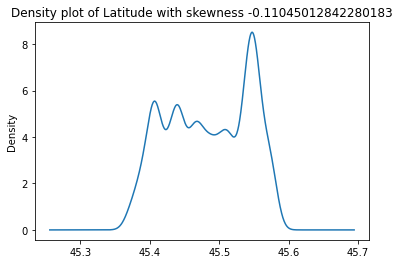

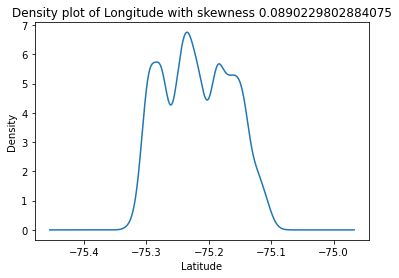

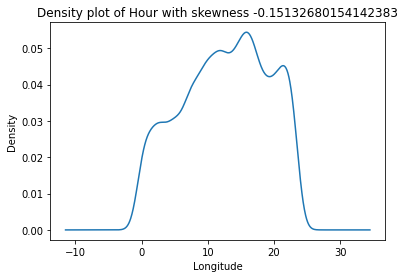

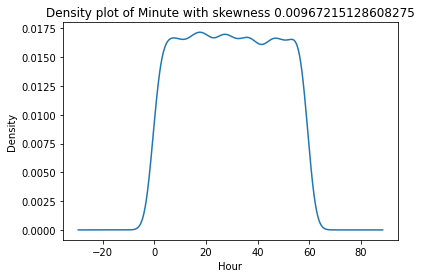

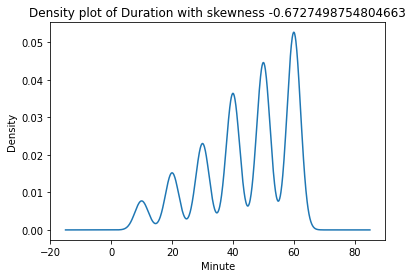

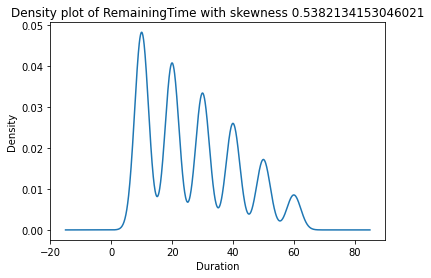

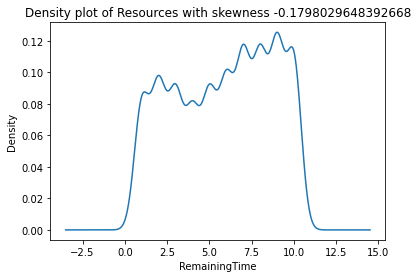

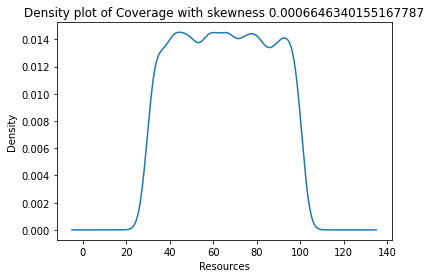

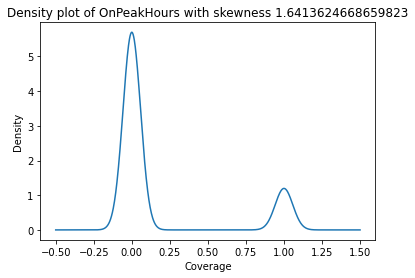

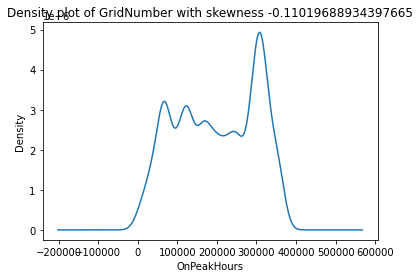

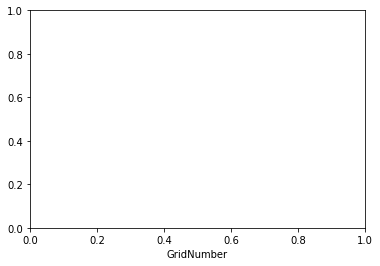

In [7]:
for i in X_data.columns:
  X_train[i].plot(kind='kde')
  plt.title("Density plot of "+ str(i) +" with skewness "+ str(df[i].skew(axis=0)))
  plt.show()
  plt.xlabel(i)
  print('\n')

We can observe that the values are unbalanced 

d:\softwares\Python\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\softwares\Python\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 11994 samples in 0.016s...
[t-SNE] Computed neighbors for 11994 samples in 0.299s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11994
[t-SNE] Computed conditional probabilities for sample 2000 / 11994
[t-SNE] Computed conditional probabilities for sample 3000 / 11994
[t-SNE] Computed conditional probabilities for sample 4000 / 11994
[t-SNE] Computed conditional probabilities for sample 5000 / 11994
[t-SNE] Computed conditional probabilities for sample 6000 / 11994
[t-SNE] Computed conditional probabilities for sample 7000 / 11994
[t-SNE] Computed conditional probabilities for sample 8000 / 11994
[t-SNE] Computed conditional probabilities for sample 9000 / 11994
[t-SNE] Computed conditional probabilities for sample 10000 / 11994
[t-SNE] Computed conditional probabilities for sample 11000 / 11994
[t-SNE] Computed conditional probabilities for sample 11994 / 11994
[t-SNE] Mean sigma: 13.520078
[t-SNE] KL divergenc

[Text(0.5, 1.0, 'TSNE projection for Training dataset')]

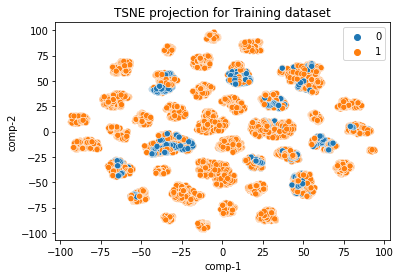

In [8]:
# TSNE plot for training 
import seaborn as sns
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1)
z = tsne.fit_transform(X_train) 
TSNE_training = pd.DataFrame()
TSNE_training["y"] = y_train
TSNE_training["comp-1"] = z[:,0]
TSNE_training["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=TSNE_training.y.tolist(),
                data=TSNE_training).set(title="TSNE projection for Training dataset") 

d:\softwares\Python\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\softwares\Python\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2490 samples in 0.003s...
[t-SNE] Computed neighbors for 2490 samples in 0.030s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2490
[t-SNE] Computed conditional probabilities for sample 2000 / 2490
[t-SNE] Computed conditional probabilities for sample 2490 / 2490
[t-SNE] Mean sigma: 23.389448
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.543522
[t-SNE] KL divergence after 1000 iterations: 0.328856


[Text(0.5, 1.0, 'TSNE projection for Training dataset')]

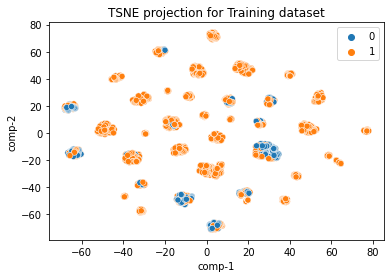

In [9]:
# TSNE plot for training 
import seaborn as sns
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1)
z = tsne.fit_transform(X_test) 
TSNE_testing = pd.DataFrame()
TSNE_testing["y"] = y_test
TSNE_testing["comp-1"] = z[:,0]
TSNE_testing["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=TSNE_testing.y.tolist(),
                data=TSNE_testing).set(title="TSNE projection for Training dataset") 

In [10]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt


Accuracy of K Neighbors Classifier is 89.39759036144578


d:\softwares\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


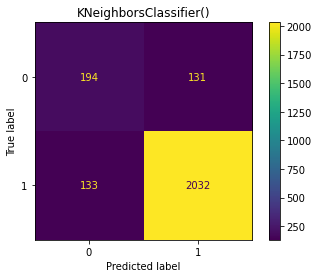

Accuracy of Logistic Regression is 86.94779116465864


d:\softwares\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


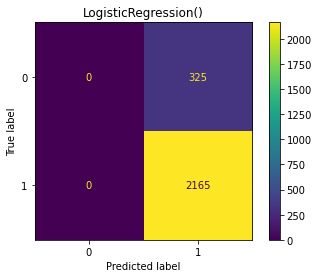

Accuracy of SVC is 86.94779116465864


d:\softwares\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


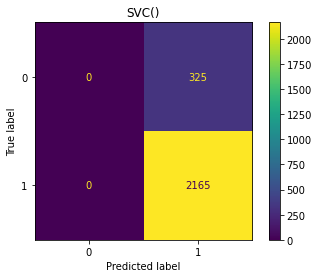

Accuracy of Decision Tree Classifier is 94.41767068273093


d:\softwares\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


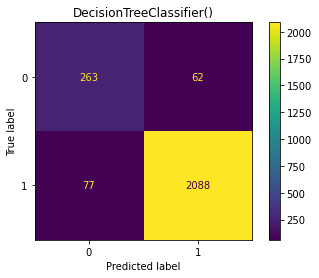

Accuracy of Gaussian Naive Bayes is 86.90763052208835


d:\softwares\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


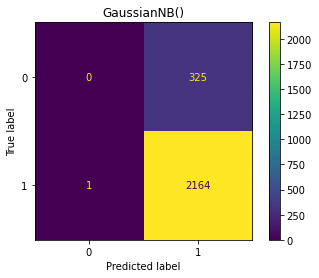

In [11]:
Accuracy_scores = []
models = [KNeighborsClassifier(),LogisticRegression(),SVC(),DecisionTreeClassifier(),GaussianNB()]
model_name = ['K Neighbors Classifier','Logistic Regression','SVC','Decision Tree Classifier','Gaussian Naive Bayes']
iteration = 0
for model in models:
    model.fit(X_train,y_train)
    y_predicted=model.predict(X_test)
    Accuracy_scores.append(accuracy_score(y_test,y_predicted)*100)
    print('Accuracy of',model_name[iteration],'is',Accuracy_scores[iteration])
    iteration+=1
    plot_confusion_matrix(model,X_test,y_test)
    plt.title(model)
    plt.show()

<BarContainer object of 5 artists>

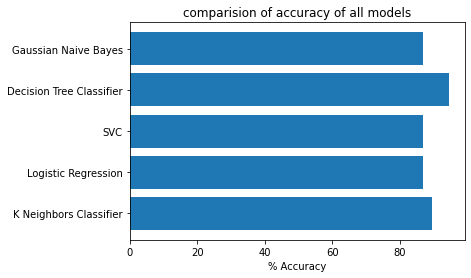

In [12]:
plt.title('comparision of accuracy of all models')
plt.xlabel('% Accuracy')
plt.barh(model_name,Accuracy_scores)

In [13]:
# best baseline performance
print(model_name[Accuracy_scores.index(max(Accuracy_scores))],'has the best accuracy as a baseline model')

Decision Tree Classifier has the best accuracy as a baseline model


## Dimensionality reduction

###  Using PCA

In [14]:
from sklearn.decomposition import PCA
# from sklearn.preprocessing import train_test_split
acc_dict_pca={}
for n_components in range(2,11):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.fit_transform(X_test)
    DST_PCA_model = DecisionTreeClassifier()
    DST_PCA_model.fit(X_train_pca,y_train)
    y_predicted_pca = DST_PCA_model.predict(X_test_pca)
    acc_pca = accuracy_score(y_test,y_predicted_pca)
    acc_dict_pca[n_components]=acc_pca*100

Text(0, 0.5, 'Accuracy (%)')

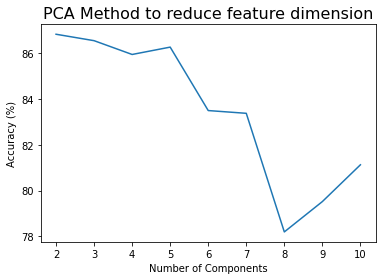

In [15]:
plt.plot(*zip(*sorted(acc_dict_pca.items())))
Title = "PCA Method to reduce feature dimension"
plt.title(Title, fontsize=16)
plt.xlabel("Number of Components")
plt.ylabel("Accuracy (%)")

In [16]:
print('for n_components of PCA =',max(acc_dict_pca,key=acc_dict_pca.get), 'we get the maximum accuracy with our baseline model')

for n_components of PCA = 2 we get the maximum accuracy with our baseline model


### Using Autoencoder

In [17]:
from sklearn.neural_network import MLPRegressor
import numpy as np
def encoder(encoder_weights, encoder_biases, data):
    res_ae = data
    for index, (w, b) in enumerate(zip(encoder_weights, encoder_biases)):
        if index+1 == len(encoder_weights):
            res_ae = res_ae@w+b 
        else:
            res_ae = np.maximum(0, res_ae@w+b)
    return res_ae

In [18]:
from sklearn.neural_network import MLPRegressor
import numpy as np
acc_dict_ae={}
dst_acc = {}
for iteration in range(2,11):
    autoencoder = MLPRegressor(alpha=1e-15, 
                            hidden_layer_sizes=(50, 100, 50, iteration, 50, 100, 50), 
                            random_state=1, max_iter=20000)

    autoencoder.fit(X_train, X_train)

    W = autoencoder.coefs_
    biases = autoencoder.intercepts_
    encoder_weights = W[0:4]
    encoder_biases = biases[0:4]
    res_ae_train = encoder(encoder_weights, encoder_biases, X_train)
    res_ae_test = encoder(encoder_weights, encoder_biases, X_test)
    DST_AE_Model = DecisionTreeClassifier()
    DST_AE_Model.fit(res_ae_train,y_train)
    y_predicted_ae = DST_AE_Model.predict(res_ae_test)
    print(accuracy_score(y_test,y_predicted_ae),'for',iteration,'features')
    acc_ae = accuracy_score(y_test,y_predicted_ae)*100
    acc_dict_ae[iteration]=acc_ae
    dst_acc[iteration]=Accuracy_scores[3]


0.8622489959839358 for 2 features
0.8863453815261044 for 3 features
0.8578313253012049 for 4 features
0.8602409638554217 for 5 features
0.8710843373493976 for 6 features
0.8843373493975903 for 7 features
0.8815261044176707 for 8 features
0.9088353413654618 for 9 features
0.863855421686747 for 10 features


Text(0, 0.5, 'Accuracy (%)')

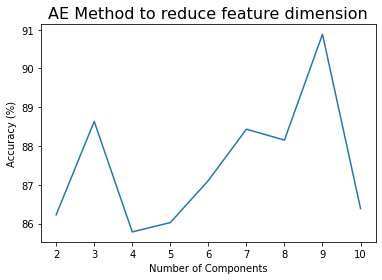

In [19]:
plt.plot(*zip(*sorted(acc_dict_ae.items())))
Title = "AE Method to reduce feature dimension"
plt.title(Title, fontsize=16)
plt.xlabel("Number of Components")
plt.ylabel("Accuracy (%)")

In [20]:
print('for minimum hidden layer of Autoencoder =',max(acc_dict_ae,key=acc_dict_ae.get), 'we get the maximum accuracy with our baseline model')

for minimum hidden layer of Autoencoder = 9 we get the maximum accuracy with our baseline model


Text(0, 0.5, 'Accuracy (%)')

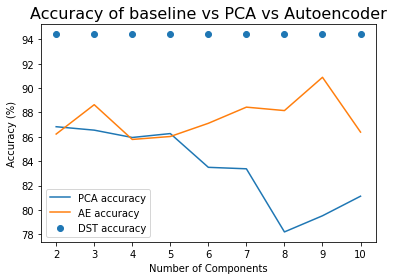

In [21]:
plt.plot(*zip(*sorted(acc_dict_pca.items())),label='PCA accuracy')
plt.plot(*zip(*sorted(acc_dict_ae.items())),label='AE accuracy')
plt.scatter(*zip(*sorted(dst_acc.items())),label='DST accuracy')

plt.title('Accuracy of baseline vs PCA vs Autoencoder', fontsize=16)
plt.legend()
plt.xlabel("Number of Components", )
plt.ylabel("Accuracy (%)", )

the best accuracy we got from dimentionality reduction was from Autoencoder with 9 features   
else the best accuracy as fas was provided by baseline DST

## Wrapper method

In [22]:
from sklearn.feature_selection import SequentialFeatureSelector
Wrapper_accuracies={}
for iteration in range(2,10):
    feature_selector = SequentialFeatureSelector(DecisionTreeClassifier(),n_features_to_select=iteration)
    features = feature_selector.fit(np.array(X_data),y_data)

    backward_elimination_feature_names=X_data.columns[features.get_support()]
    backward_elimination_features_df=X_data[backward_elimination_feature_names]
    model = DecisionTreeClassifier()
    model.fit(X_train[backward_elimination_feature_names],y_train)
    y_predicted_model = model.predict(X_test[backward_elimination_feature_names])
    Wrapper_accuracy = accuracy_score(y_test,y_predicted_model)*100
    print('Accuracy of wrapper method with',iteration,'features',Wrapper_accuracy)
    Wrapper_accuracies[iteration]=Wrapper_accuracy

Accuracy of wrapper method with 2 features 97.59036144578313
Accuracy of wrapper method with 3 features 97.83132530120481
Accuracy of wrapper method with 4 features 98.43373493975903
Accuracy of wrapper method with 5 features 98.51405622489959
Accuracy of wrapper method with 6 features 97.91164658634538
Accuracy of wrapper method with 7 features 97.95180722891567
Accuracy of wrapper method with 8 features 97.2289156626506
Accuracy of wrapper method with 9 features 96.62650602409639


Text(0, 0.5, 'Accuracy (%)')

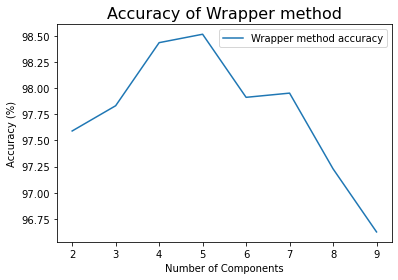

In [23]:
plt.plot(*zip(*sorted(Wrapper_accuracies.items())),label='Wrapper method accuracy')
plt.title('Accuracy of Wrapper method', fontsize=16)
plt.legend()
plt.xlabel("Number of Components", )
plt.ylabel("Accuracy (%)", )

## Filter method

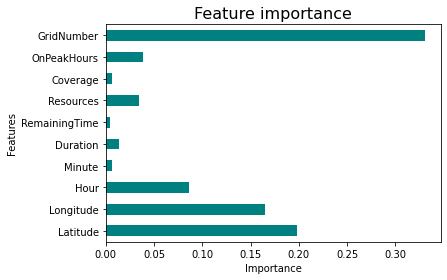

In [24]:
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(X_data,y_data)
feat_importances = pd.Series(importances, X_data.columns[0:len(X_data.columns)])
feat_importances.plot(kind='barh',color='teal')
plt.title('Feature importance', fontsize=16)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [25]:
feat_importances.nlargest(4)

GridNumber    0.330099
Latitude      0.197824
Longitude     0.164884
Hour          0.086742
dtype: float64

In [26]:
Information_gain_features_name = ['Latitude','GridNumber','Longitude','Hour']
model = DecisionTreeClassifier()
model.fit(X_train[Information_gain_features_name],y_train)
y_predicted_model = model.predict(X_test[Information_gain_features_name])
Filter_accuracy_score = accuracy_score(y_test,y_predicted_model)
print('Accuracy of Filter method with 4 features',Filter_accuracy_score)

Accuracy of Filter method with 4 features 0.9771084337349397


In [27]:
accuracies = [Filter_accuracy_score*100,Wrapper_accuracies[4],acc_dict_pca[2],Accuracy_scores[3],acc_dict_ae[9]]
names = ['Filter method','Wrapper method','PCA','Baseline','Autoencoder']

Text(0.5, 1.0, 'Comparing all the methods')

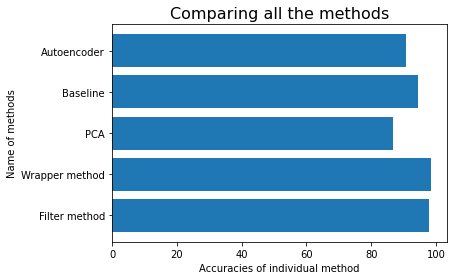

In [28]:
plt.barh(names,accuracies)
plt.xlabel('Accuracies of individual method')
plt.ylabel('Name of methods')
plt.title('Comparing all the methods', fontsize=16)

Highest accuracy is obtained after selecting features using wrapper method

## Updating the dataset

In [29]:
feature_selector = SequentialFeatureSelector(DecisionTreeClassifier(),n_features_to_select=4)
features = feature_selector.fit(np.array(X_data),y_data)
backward_elimination_feature_names=X_data.columns[features.get_support()]

In [30]:
X_train = X_train[backward_elimination_feature_names]
X_test = X_test[backward_elimination_feature_names]

## Adding Random forest 

In [31]:
from sklearn.ensemble import RandomForestClassifier
RandomForestModel = RandomForestClassifier()
RandomForestModel.fit(X_train,y_train)
# RandomForestModel.score(X_test,y_test)
y_predicted_RF = RandomForestModel.predict(X_test)
RF_accuracy_score = accuracy_score(y_test,y_predicted_RF)*100
print('Accuracy of base Random Forest',RF_accuracy_score)

Accuracy of base Random Forest 98.83534136546184


In [32]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(X_train,y_train)
AdaBoostClassifier_score = clf.score(X_test,y_test)*100
print('Accuracy of base AdaBoostClassifier',AdaBoostClassifier_score)

Accuracy of base AdaBoostClassifier 95.06024096385542


In [33]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
GradientBoostingClassifier_score = clf.score(X_test,y_test)*100
print('Accuracy of base Gradient Boosting',GradientBoostingClassifier_score)

Accuracy of base Gradient Boosting 97.75100401606426


Text(0.5, 0, '% Accuracy')

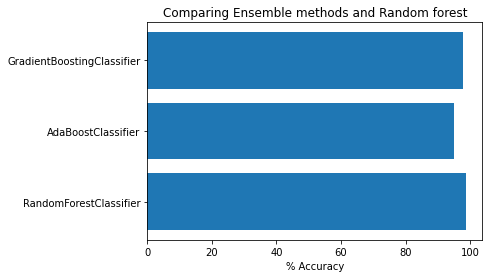

In [34]:
plt.barh(['RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier'],[RF_accuracy_score,AdaBoostClassifier_score,GradientBoostingClassifier_score])
plt.title('Comparing Ensemble methods and Random forest')
plt.xlabel('% Accuracy')

## Using GridCV to get best parameters

In [35]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion':['gini']}

In [36]:
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train,y_train)
rf_random.score(X_test,y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


0.9899598393574297

In [37]:
rf_random.best_params_

{'n_estimators': 1577,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'criterion': 'gini',
 'bootstrap': True}

In [41]:
Final_model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
Final_model.fit(X_train,y_train)
Final_model.score(X_test,y_test)

0.9903614457831326